In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
train_df = pd.read_csv('../input/train_relationships.csv')
train_images =  Path('../input/train/')
test_images = Path('.../input/test/')
train_df.head()


**Removing Missing Directories
**
<br>
Initial Shape of the dataframe before removing missing directories

In [ ]:
train_df.shape

In [ ]:
missing_folders = []
temp_list = list(train_df.p1)+list(train_df.p2)
all_list = list(set(temp_list))
all_list.sort()
for i in all_list:
    if(os.path.exists(train_images/i)==False):
        #If no such directory exists
        missing_folders.append(i)
    
print(len(missing_folders))

In [ ]:
train_df = train_df[~train_df["p1"].isin(missing_folders)]
train_df = train_df[~train_df["p2"].isin(missing_folders)]

Shape after removing all the missing directories

In [ ]:
train_df.shape #Ignoring missing directories

<h1>In order to create a function that displays images in a subplot</h1>
**Create a list that contains all the directories in the training_relationships dataset**

In [ ]:
temp_list = list(train_df.p1) + list(train_df.p2)
all_folders = list(set(temp_list))
all_folders.sort()


**Calculate the maximum number of possible images in the folder for the next function**

In [ ]:
max_images = 0
for i in all_folders:
    img_list = os.listdir(train_images / i)
    if(len(img_list)>max_images):
        max_images = len(img_list)
        
print(max_images)


<h2>Show Image Function </h2>
Using a nx10 subplot to display the images based on the number of images in the folder. If the number of Images is 45 then it will create a 5x10 subplot. If the number of images is less than 10, we default to creating a 2x5 subplot

In [ ]:
def show_img(n):
    try:
        n = int(n)
        img_list = os.listdir(train_images / all_folders[n])
        num_images = len(img_list)
        print(num_images)
        if(num_images<=10):
            fig,ax = plt.subplots(2,5, figsize=(20,10))
            print(ax.shape)
            for i in range(len(img_list)):
                with open(train_images / all_folders[n] / img_list[i] ,'rb') as f:
                    img = Image.open(f)
                    ax[i//5][i%5].imshow(img)
            fig.show()

        else:
            fig,ax = plt.subplots((-(-num_images//10)),10, figsize=(40,10))
            print(ax.shape)
            for i in range(len(img_list)):
                with open(train_images / all_folders[n] / img_list[i] ,'rb') as f:
                    img = Image.open(f)
                    ax[i//10][i%10].imshow(img)
            fig.show()
    except ValueError:
        n = all_folders.index(n)
        img_list = os.listdir(train_images / all_folders[n])
        num_images = len(img_list)
        print(num_images)
        if(num_images<=10):
            fig,ax = plt.subplots(2,5, figsize=(20,10))
            print(ax.shape)
            for i in range(len(img_list)):
                with open(train_images / all_folders[n] / img_list[i] ,'rb') as f:
                    img = Image.open(f)
                    ax[i//5][i%5].imshow(img)
            fig.show()

        else:
            fig,ax = plt.subplots((-(-num_images//10)),10, figsize=(40,10))
            print(ax.shape)
            for i in range(len(img_list)):
                with open(train_images / all_folders[n] / img_list[i] ,'rb') as f:
                    img = Image.open(f)
                    ax[i//10][i%10].imshow(img)
            fig.show()
        


<h2> Function to Keep Images Side by Side </h2>

In [61]:
def side_by_side(folder1, folder2):

    img_list1 = os.listdir(train_images / folder1)
    img_list2 = os.listdir(train_images / folder2)
    print(img_list1)
    print(img_list2)

    fig,ax = plt.subplots(1,2, figsize=(10,10), squeeze=False)

    with open(train_images / folder1 / img_list1[0] ,'rb') as f:
        img = Image.open(f)
        ax[0][0].imshow(img)
        f.close()
    with open(train_images / folder2 / img_list2[0] ,'rb') as f:
        img = Image.open(f)
        ax[0][1].imshow(img)
        f.close()
    fig.show()

#         else:
#             fig,ax = plt.subplots((-(-num_images//10)),10, figsize=(40,10))
#             print(ax.shape)
#             for i in range(len(img_list)):
#                 with open(train_images / all_folders[n] / img_list[i] ,'rb') as f:
#                     img = Image.open(f)
#                     ax[i//10][i%10].imshow(img)
#             fig.show()



We can use functions to display images by specifying their folder or the order it appears in the list

10
(2, 5)


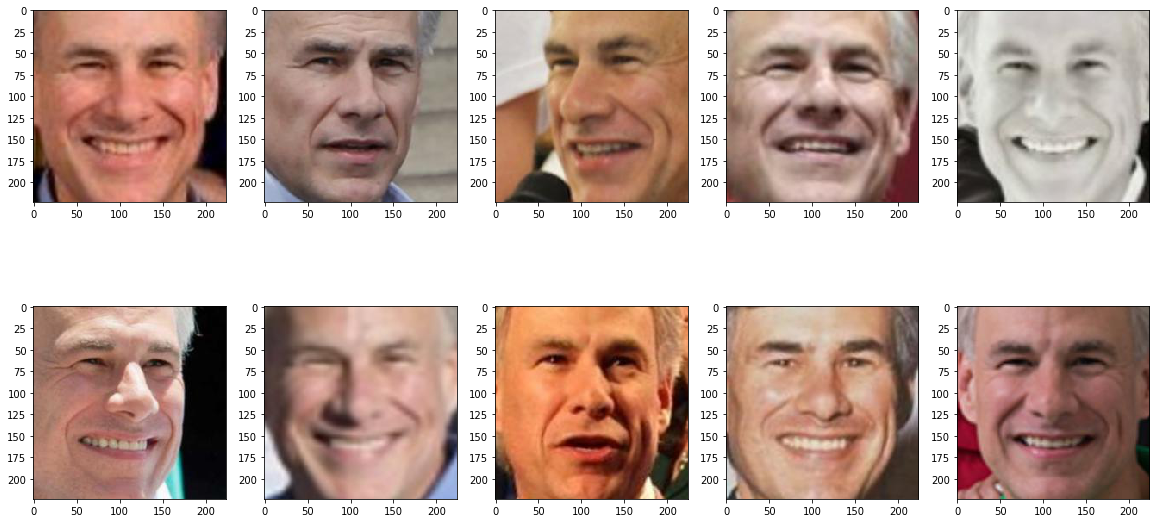

In [72]:
show_img('F0002/MID1')
#show_img(0)


['P00056_face1.jpg', 'P00058_face2.jpg', 'P00053_face1.jpg', 'P00059_face2.jpg', 'P00055_face1.jpg', 'P00060_face1.jpg', 'P00061_face3.jpg', 'P00057_face2.jpg', 'P00062_face1.jpg']
['P00061_face1.jpg', 'P00059_face1.jpg', 'P00062_face2.jpg', 'P00057_face1.jpg', 'P00053_face3.jpg', 'P00054_face1.jpg']


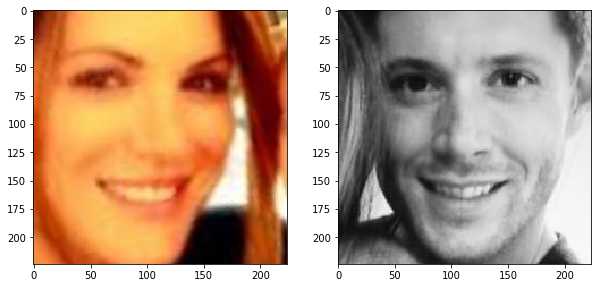

In [74]:
side_by_side("F0005/MID1","F0005/MID3")